# Fit AdapIF to HH Spike Trains

In [1]:
from brian2 import *
from brian2modelfitting import *

import numpy as np

INFO       Cache size for target "cython": 1121 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/alteska/.cython/brian_extensions" directory. [brian2]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyte

In [2]:
dt = 0.01*ms
defaultclock.dt = dt

## Load the Data

In [3]:
voltage1 = genfromtxt('voltage1nA.csv', delimiter=',')
voltage2 = genfromtxt('voltage2nA.csv', delimiter=',')

In [4]:
inp_cur1 = genfromtxt('inp_cur1nA.csv', delimiter=',')
inp_cur2 = genfromtxt('inp_cur2nA.csv', delimiter=',')
inp_current = [inp_cur1, inp_cur2]
inp_current

[array([0.        , 0.05553714, 0.18616409, ..., 0.34263957, 0.23894004,
        0.24489567]),
 array([ 0.        , -0.08325095,  0.03536872, ...,  0.76675788,
         0.90452414,  1.0627096 ])]

In [5]:
out_spikes1 = genfromtxt('out_spikes1nA.csv', delimiter=',')
out_spikes2 = genfromtxt('out_spikes2nA.csv', delimiter=',')
out_spikes = [out_spikes1, out_spikes2]
out_spikes

[array([  71.23,  122.83,  210.92,  225.54,  239.2 ,  281.24,  303.7 ,
         336.2 ,  399.15,  536.37,  597.07,  663.54,  811.95,  939.29,
         962.57,  991.39, 1009.98, 1035.9 , 1078.18, 1113.35, 1155.7 ,
        1200.08, 1270.3 , 1293.  , 1315.59, 1467.74, 1488.74, 1522.48,
        1554.55, 1571.92, 1670.46, 1705.1 , 1730.37, 1746.35, 1793.  ,
        1866.76, 1892.38, 1937.42, 1948.02, 1986.21, 2111.73, 2171.24,
        2276.79, 2418.89, 2440.3 , 2546.8 , 2584.71, 2599.82, 2662.19,
        2837.62, 2961.99, 3005.25, 3059.41, 3177.22, 3190.72, 3252.33,
        3349.37, 3418.14, 3466.01, 3521.96, 3604.86, 3638.6 , 3660.36,
        3680.88, 3691.25, 3720.41, 3829.22, 3867.82, 3904.32, 3951.12,
        3961.46, 4031.54, 4085.24, 4118.16, 4163.5 , 4199.79, 4264.13,
        4357.91, 4377.63, 4440.7 , 4477.18, 4573.26, 4614.94, 4676.63,
        4696.7 , 4713.32, 4843.36]),
 array([4.81000e+00, 2.39700e+01, 6.56500e+01, 7.03400e+01, 1.01920e+02,
        1.10710e+02, 1.17300e+02, 2.47

## Model Fitting

In [6]:
# tau = 12.44*ms
# taut = 97.64*ms
# a = 0.21
# alpha = 7.2*mV
# R = 76*Mohm

model = '''
        dv/dt = (R*I- v)/tau :volt
        dvt/dt = (a*v - vt) / taut :volt
        alpha : volt (constant)
        a : 1 (constant)
        R : ohm (constant)
        tau : second (constant)
        taut : second (constant)
        '''
reset = '''
v = 0*mV
vt = vt + alpha
'''

In [7]:
n_opt = NevergradOptimizer()
metric = GammaFactor(time=5*second, delta=4*ms)

In [8]:
fitter = SpikeFitter(model=model, input_var='I', dt=dt,
                     input=inp_current * nA, output=out_spikes,
                     n_samples=100,
                     threshold='v > vt',
                     reset=reset,
                     refractory=1.4*ms,
                     param_init={'v': -65*mV},
                     )

In [9]:
result_dict, error = fitter.fit(n_rounds=40,
                                optimizer=n_opt,
                                metric=metric,
                                callback='text',
                                alpha=[5,10]*mV,
                                a = [0.1, 1],
                                R = [1, 100]*Mohm, 
                                tau = [10, 13]*ms,
                                taut = [90, 100]*ms,
                               )

Round 0: fit (43690485.979607135, 0.012407082445986964, 0.6630277775390142, 0.09446702272804408, 0.006904455422442542) with error: 0.03333087893152599
Round 1: fit (43690485.979607135, 0.012407082445986964, 0.6630277775390142, 0.09446702272804408, 0.006904455422442542) with error: 0.03333087893152599
Round 2: fit (50195485.85920378, 0.011607159333807895, 0.8690141178685669, 0.09815903573325321, 0.008280415793730855) with error: 0.03297534271161717
Round 3: fit (50195485.85920378, 0.011607159333807895, 0.8690141178685669, 0.09815903573325321, 0.008280415793730855) with error: 0.03297534271161717
Round 4: fit (50195485.85920378, 0.011607159333807895, 0.8690141178685669, 0.09815903573325321, 0.008280415793730855) with error: 0.03297534271161717
Round 5: fit (55029052.96378842, 0.012592290595539169, 0.8229750813752077, 0.09290350186127863, 0.00891366810919892) with error: 0.03297534271161717
Round 6: fit (55029052.96378842, 0.012592290595539169, 0.8229750813752077, 0.09290350186127863, 0.0

In [10]:
result_dict

{'R': 62272340.48317672,
 'tau': 0.012669003520167366,
 'a': 0.970957513171043,
 'taut': 0.09936894104438242,
 'alpha': 0.009850571174664608}

In [11]:
error

0.004190525357976219

In [12]:
1 - error

0.9958094746420237

In [13]:
# visualization of the results
spikes = fitter.generate_spikes(params=None)
print('spike times:', spikes)

spike times: [array([  46.92,   48.32,   69.39,  121.56,  208.41,  219.27,  232.84,
        381.85,  399.18,  467.06,  533.37,  589.81,  660.1 ,  663.57,
        775.7 ,  806.47,  849.79,  933.55,  935.38,  938.61,  992.26,
       1010.78, 1112.5 , 1157.12, 1268.56, 1289.63, 1315.5 , 1433.33,
       1453.03, 1479.26, 1489.48, 1554.81, 1655.78, 1672.32, 1727.25,
       1742.52, 1865.83, 1891.71, 1936.71, 1986.2 , 2097.76, 2110.42,
       2174.87, 2275.42, 2315.49, 2414.66, 2416.06, 2430.61, 2542.63,
       2583.51, 2590.03, 2731.28, 2825.41, 2826.91, 2894.79, 2960.29,
       2968.69, 3007.33, 3147.68, 3173.2 , 3188.44, 3251.77, 3345.31,
       3349.14, 3418.32, 3473.19, 3521.35, 3600.5 , 3637.87, 3662.49,
       3685.86, 3825.62, 3828.85, 3870.3 , 3904.64, 3951.85, 3961.2 ,
       4083.49, 4116.02, 4172.78, 4263.22, 4271.05, 4354.17, 4365.99,
       4439.35, 4557.37, 4610.22, 4657.37, 4676.79, 4709.69, 4838.25,
       4842.91, 4979.34]), array([  17.52,   20.58,   64.19,   66.66,   69.5

In [14]:
print(len(out_spikes[0]))
print(len(spikes[0]))

87
93


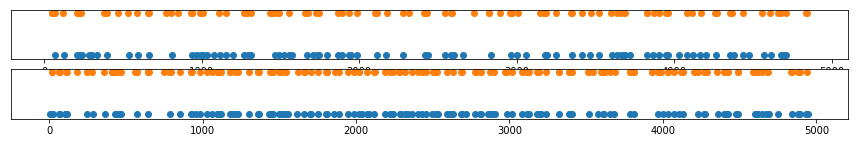

In [15]:
d=-1

fig, ax = plt.subplots(nrows=2, figsize=(15,2))

ax[0].set_yticks(np.arange(0, 1, step=1))
ax[0].scatter(out_spikes[0][:d], np.ones_like(out_spikes[0][:d]));
ax[0].scatter(spikes[0][:d], np.ones_like(spikes[0][:d])*2);

ax[1].set_yticks(np.arange(0, 1, step=1))
ax[1].scatter(out_spikes[1][:d], np.ones_like(out_spikes[1][:d]));
ax[1].scatter(spikes[1][:d], np.ones_like(spikes[1][:d])*2);

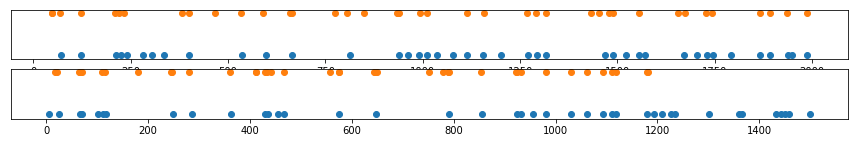

In [16]:
d=40

fig, ax = plt.subplots(nrows=2, figsize=(15,2))

ax[0].set_yticks(np.arange(0, 1, step=1))
ax[0].scatter(out_spikes[0][:d], np.ones_like(out_spikes[0][:d]));
ax[0].scatter(spikes[0][:d], np.ones_like(spikes[0][:d])*2);

ax[1].set_yticks(np.arange(0, 1, step=1))
ax[1].scatter(out_spikes[1][:d], np.ones_like(out_spikes[1][:d]));
ax[1].scatter(spikes[1][:d], np.ones_like(spikes[1][:d])*2);

In [17]:
fits = fitter.generate(params=None, output_var='v',)

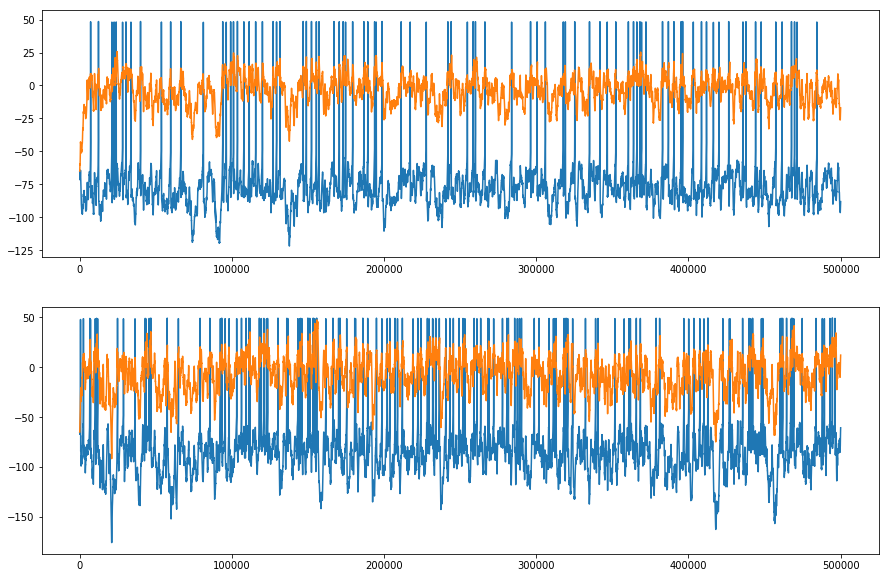

In [18]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))

ax[0].plot(voltage1);
ax[0].plot(fits[0]/mV)

ax[1].plot(voltage2);
ax[1].plot(fits[1]/mV);


In [86]:
t0 = np.arange(0, len(voltage1)*dt, dt)
t_ = out_spikes[0]
t = out_spikes[0][t_<2000]

In [87]:
t

array([  71.23,  122.83,  210.92,  225.54,  239.2 ,  281.24,  303.7 ,
        336.2 ,  399.15,  536.37,  597.07,  663.54,  811.95,  939.29,
        962.57,  991.39, 1009.98, 1035.9 , 1078.18, 1113.35, 1155.7 ,
       1200.08, 1270.3 , 1293.  , 1315.59, 1467.74, 1488.74, 1522.48,
       1554.55, 1571.92, 1670.46, 1705.1 , 1730.37, 1746.35, 1793.  ,
       1866.76, 1892.38, 1937.42, 1948.02, 1986.21])

In [90]:
v = fits[0]
d= 200000

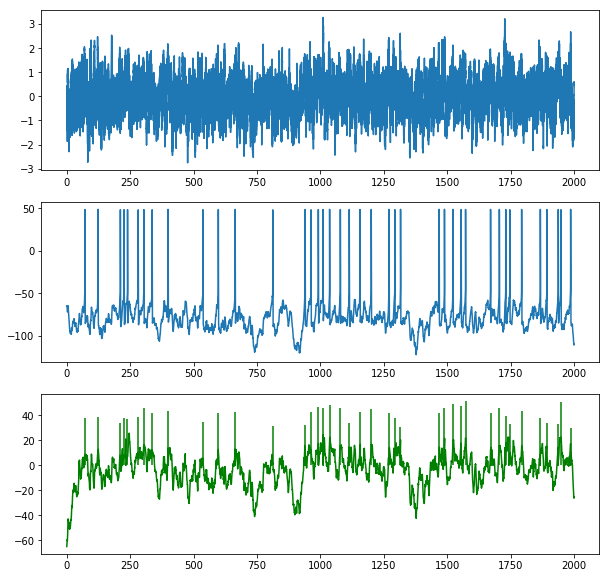

In [101]:
fig, ax = plt.subplots(nrows=3, figsize=(10,10))
ax[0].plot(t0[:d]/ms, inp_cur1[:d]);
ax[1].plot(t0[:d]/ms, voltage1[:d]);
ax[2].plot(t0[:d]/ms, v[:d]/mV, 'g')
ax[2].vlines(t, (v[np.int_(np.round(t/dt*ms))]/mV+30), np.zeros_like(t), 'g');
